In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1. DATA CLEANING 
# 2.EDA (ANALYSIS)
# 3.TEXT PREPROCESSING(STEMMING,REMOVING STOP WORDS,VECTORIZATION)
# 4. MODEL BUILDING
#5.EVALUATION
#6.IMPROVEMENTS
#7.WEBSITE
#8.HEROKU DEPLOYMENT

In [7]:
#DATA CLEANING

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.sample(5)

,v1,v2
1202,ham,"Me also da, i feel yesterday night wait til 2..."
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
1873,spam,You have WON a guaranteed å£1000 cash or a å£2...
3175,ham,Havent still waitin as usual... ÌÏ come back s...
424,ham,Send this to ur friends and receive something ...


In [11]:
#making column names descripteves - renaming the columns
df.rename(columns={'v1': 'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
2918,ham,Is xy in ur car when u picking me up?
4388,ham,"K I'm ready, &lt;#&gt; ?"
1093,ham,Well the weather in cali's great. But its comp...
1231,ham,have got * few things to do. may be in * pub l...
2529,ham,Can you just come in for a sec? There's somebo...


In [12]:
from sklearn.preprocessing import LabelEncoder #this helps converting text into numerical value since ml model cant interpret textual data
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])# spam=1 and ham/not spam=0

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check for duplicate values
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')# removes all the duplicates rows except for the first occurance

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
#EDA(EXPLORATORY DATA ANALYSIS)
df.head()



,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts() #counts how many times each unique value appears in the column target

target
0    4516
1     653
Name: count, dtype: int64

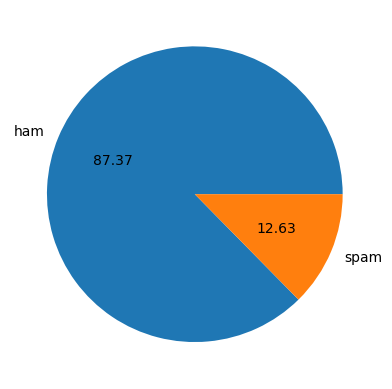

In [22]:
#for better representation using piechart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f") # autopct shows percentage on chart
plt.show()

In [23]:
#data is imbalanced--> this can make the model biased to ham


In [24]:
import nltk

In [25]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sanjiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['num_characters']=df['text'].apply(len) #gives length of every sms(in termsof number of characters used)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#fetch number of words using word tokenize (from nltk)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#now fetch number of snetences using sent_tokenize from nltk--> list of sentences
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sent']].describe() #gives statistics summary and 2 brackets since selecting multiple columns for single column single []

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#in ham messages 
df[df['target']==0] [['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target']==1] [['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
#from above data we can clearly see spam messages > ham messages ka len

In [36]:
#visual represenattion
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

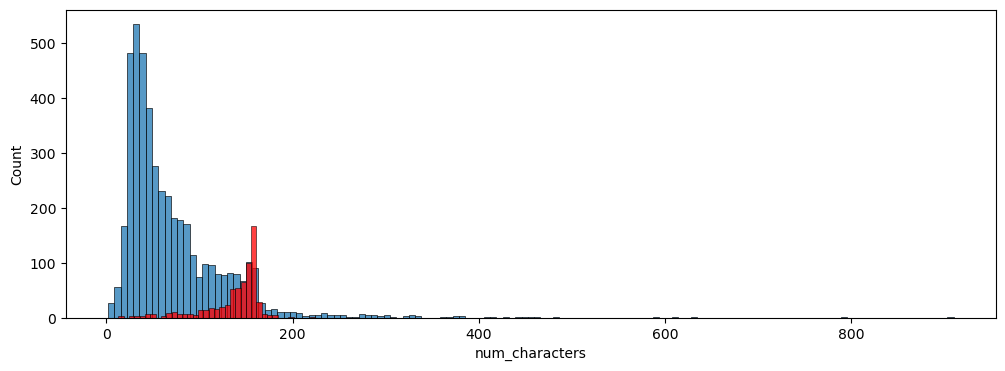

In [37]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_characters'])#ham
sns.histplot(df[df['target']==1]['num_characters'],color='red')#spam
#number of characters in ham>spam

<Axes: xlabel='num_words', ylabel='Count'>

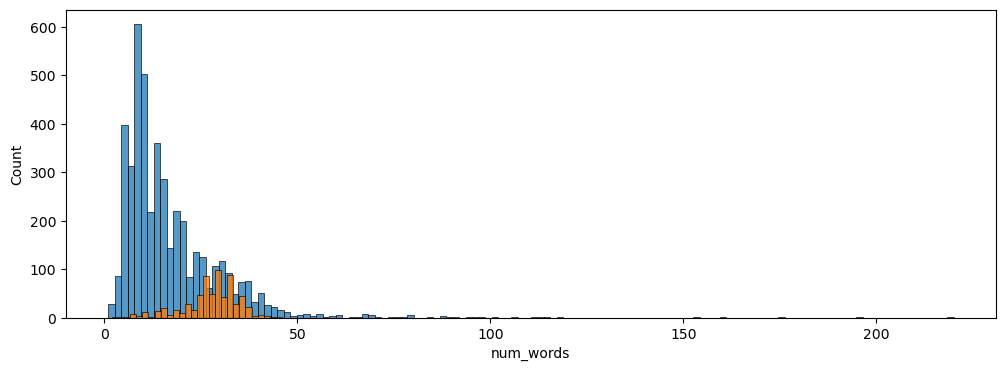

In [38]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_words'])#ham
sns.histplot(df[df['target']==1]['num_words'])#spam

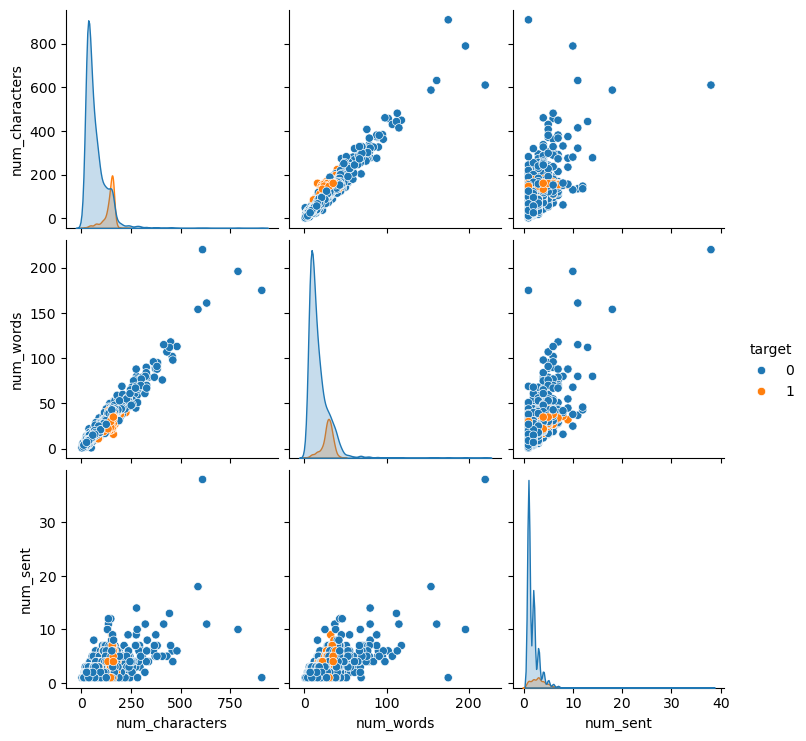

In [39]:
#relationship between these 3 new features
#you will realize frm the visualrepresentations there is outlier in data
sns.pairplot(df,hue='target')

In [40]:
#DATA PREPROCESSING
#STEPS---
#1.LOWER CASE -> TOKENIZATION(break into words) -> Removing special characters -> removing stop words and punctutaions -> stemming(breaking word into its rootword)



In [41]:
from nltk.corpus import stopwords # words having no contri in the meaning of sentence only increase the preproccesing time 
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def transform_text(text):
    text=text.lower() #step 1
    text=nltk.word_tokenize(text)#generates list of words step 2
    y=[]
    for i in text:
        if i.isalnum():# only alpa/numeric no special characters -> step 3
            y.append(i)

    text=y[:]#cloning imp
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #step 4
            y.append(i)

    text=y[:] #step 5-- stemming
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [44]:
#stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [45]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df['transformed-text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed-text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
#making a word cloud for ham and spam , this will show imp words in increased size

In [49]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500,min_font_size=10, background_color='white')

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed-text'].str.cat(sep=" "))#this will generate a wc for spam email

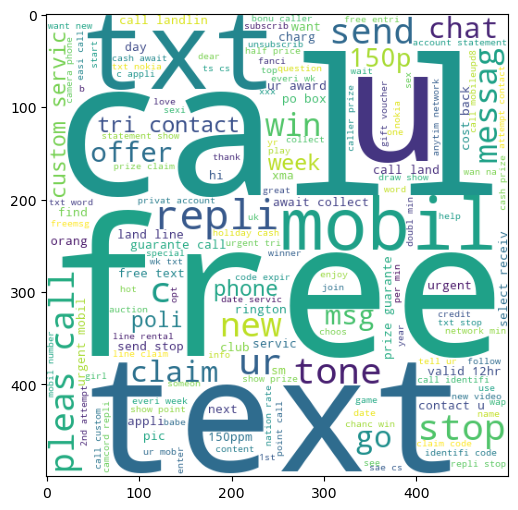

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['target']==0]['transformed-text'].str.cat(sep=" "))

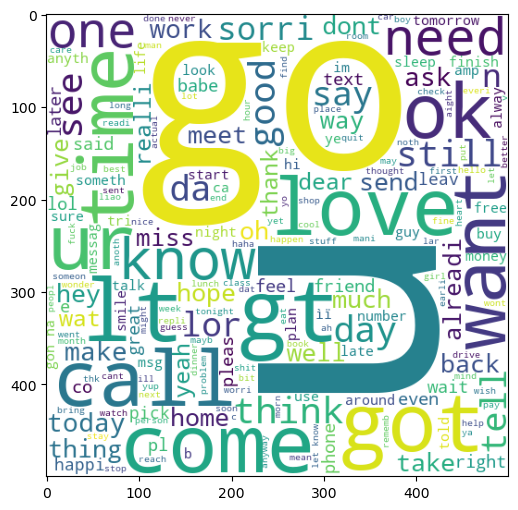

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
#top 30 words used in ham and spam messages
df.head()

,target,text,num_characters,num_words,num_sent,transformed-text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus = []
for msg in df[df['target'] == 1 ] ['transformed-text'] .tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

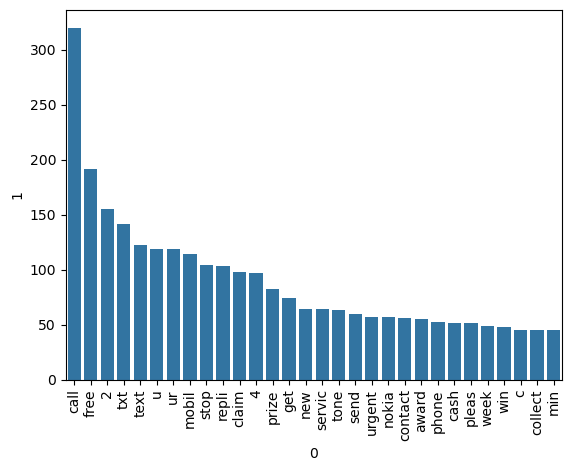

In [58]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) #shows most common 30 words
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = [] #most common words in ham
for msg in df[df['target'] == 0 ] ['transformed-text'] .tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

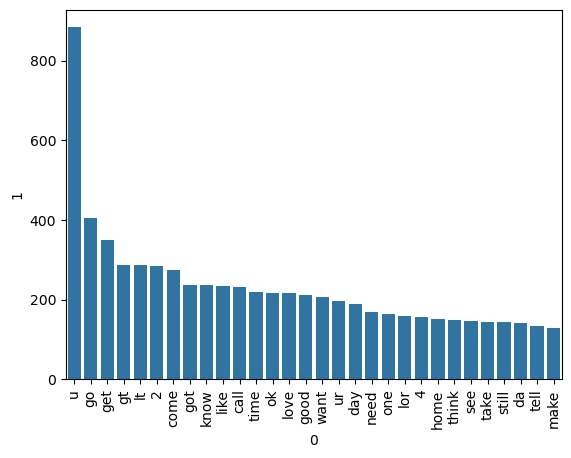

In [61]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) #shows most common 30 words
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#MODEL TRAINING
#USING NAIVE BAYES SINCE IT PERFORMS REALLY WELL ON TEXTUAL DATA ,Naive bayas is mostly used for classification problem, predicts probability using bayes thm, naive means it assumes all features r independant of each other

In [63]:
#VECTORIZE THE INPUT DATA(TRANFORMED_TEXT)
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer #converts text data into numerical data based on the number of times that word occurs
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)#selecting only top 3000 imp words

In [64]:
X=tfidf.fit_transform(df['transformed-text']).toarray() # first countVectorizer converts column to bag of words matrix which is later converted to array

In [65]:
X.shape

(5169, 3000)

In [66]:
y = df['target'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
#train test data
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test ,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [71]:
#creating object
mnb=MultinomialNB()


In [72]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))
            
